In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-customers/credit_customers.csv


## **Load The Data**

The data and the initial version of the notebook (data loading and viz) was exported from an existing notebook. The contribution is on the semi supervised learning experimentation and the building of the two models. 

In [2]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Reading
credit_c=pd.read_csv("/kaggle/input/credit-risk-customers/credit_customers.csv")

# Taking Data Copy
credit=credit_c.copy()

# Data
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## **Data Viz**

In [4]:
# Data Info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
# Changing object to category
cat= credit.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    credit[i]=credit[i].astype('category')

# Cheking Data Info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [6]:
# Checking Null Values
credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [7]:
# Statistical Description
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
# Cheking categorical features
cat=credit.select_dtypes(exclude=[np.number])
cat.columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

* Visualizing Categorical Features (Pieplot)

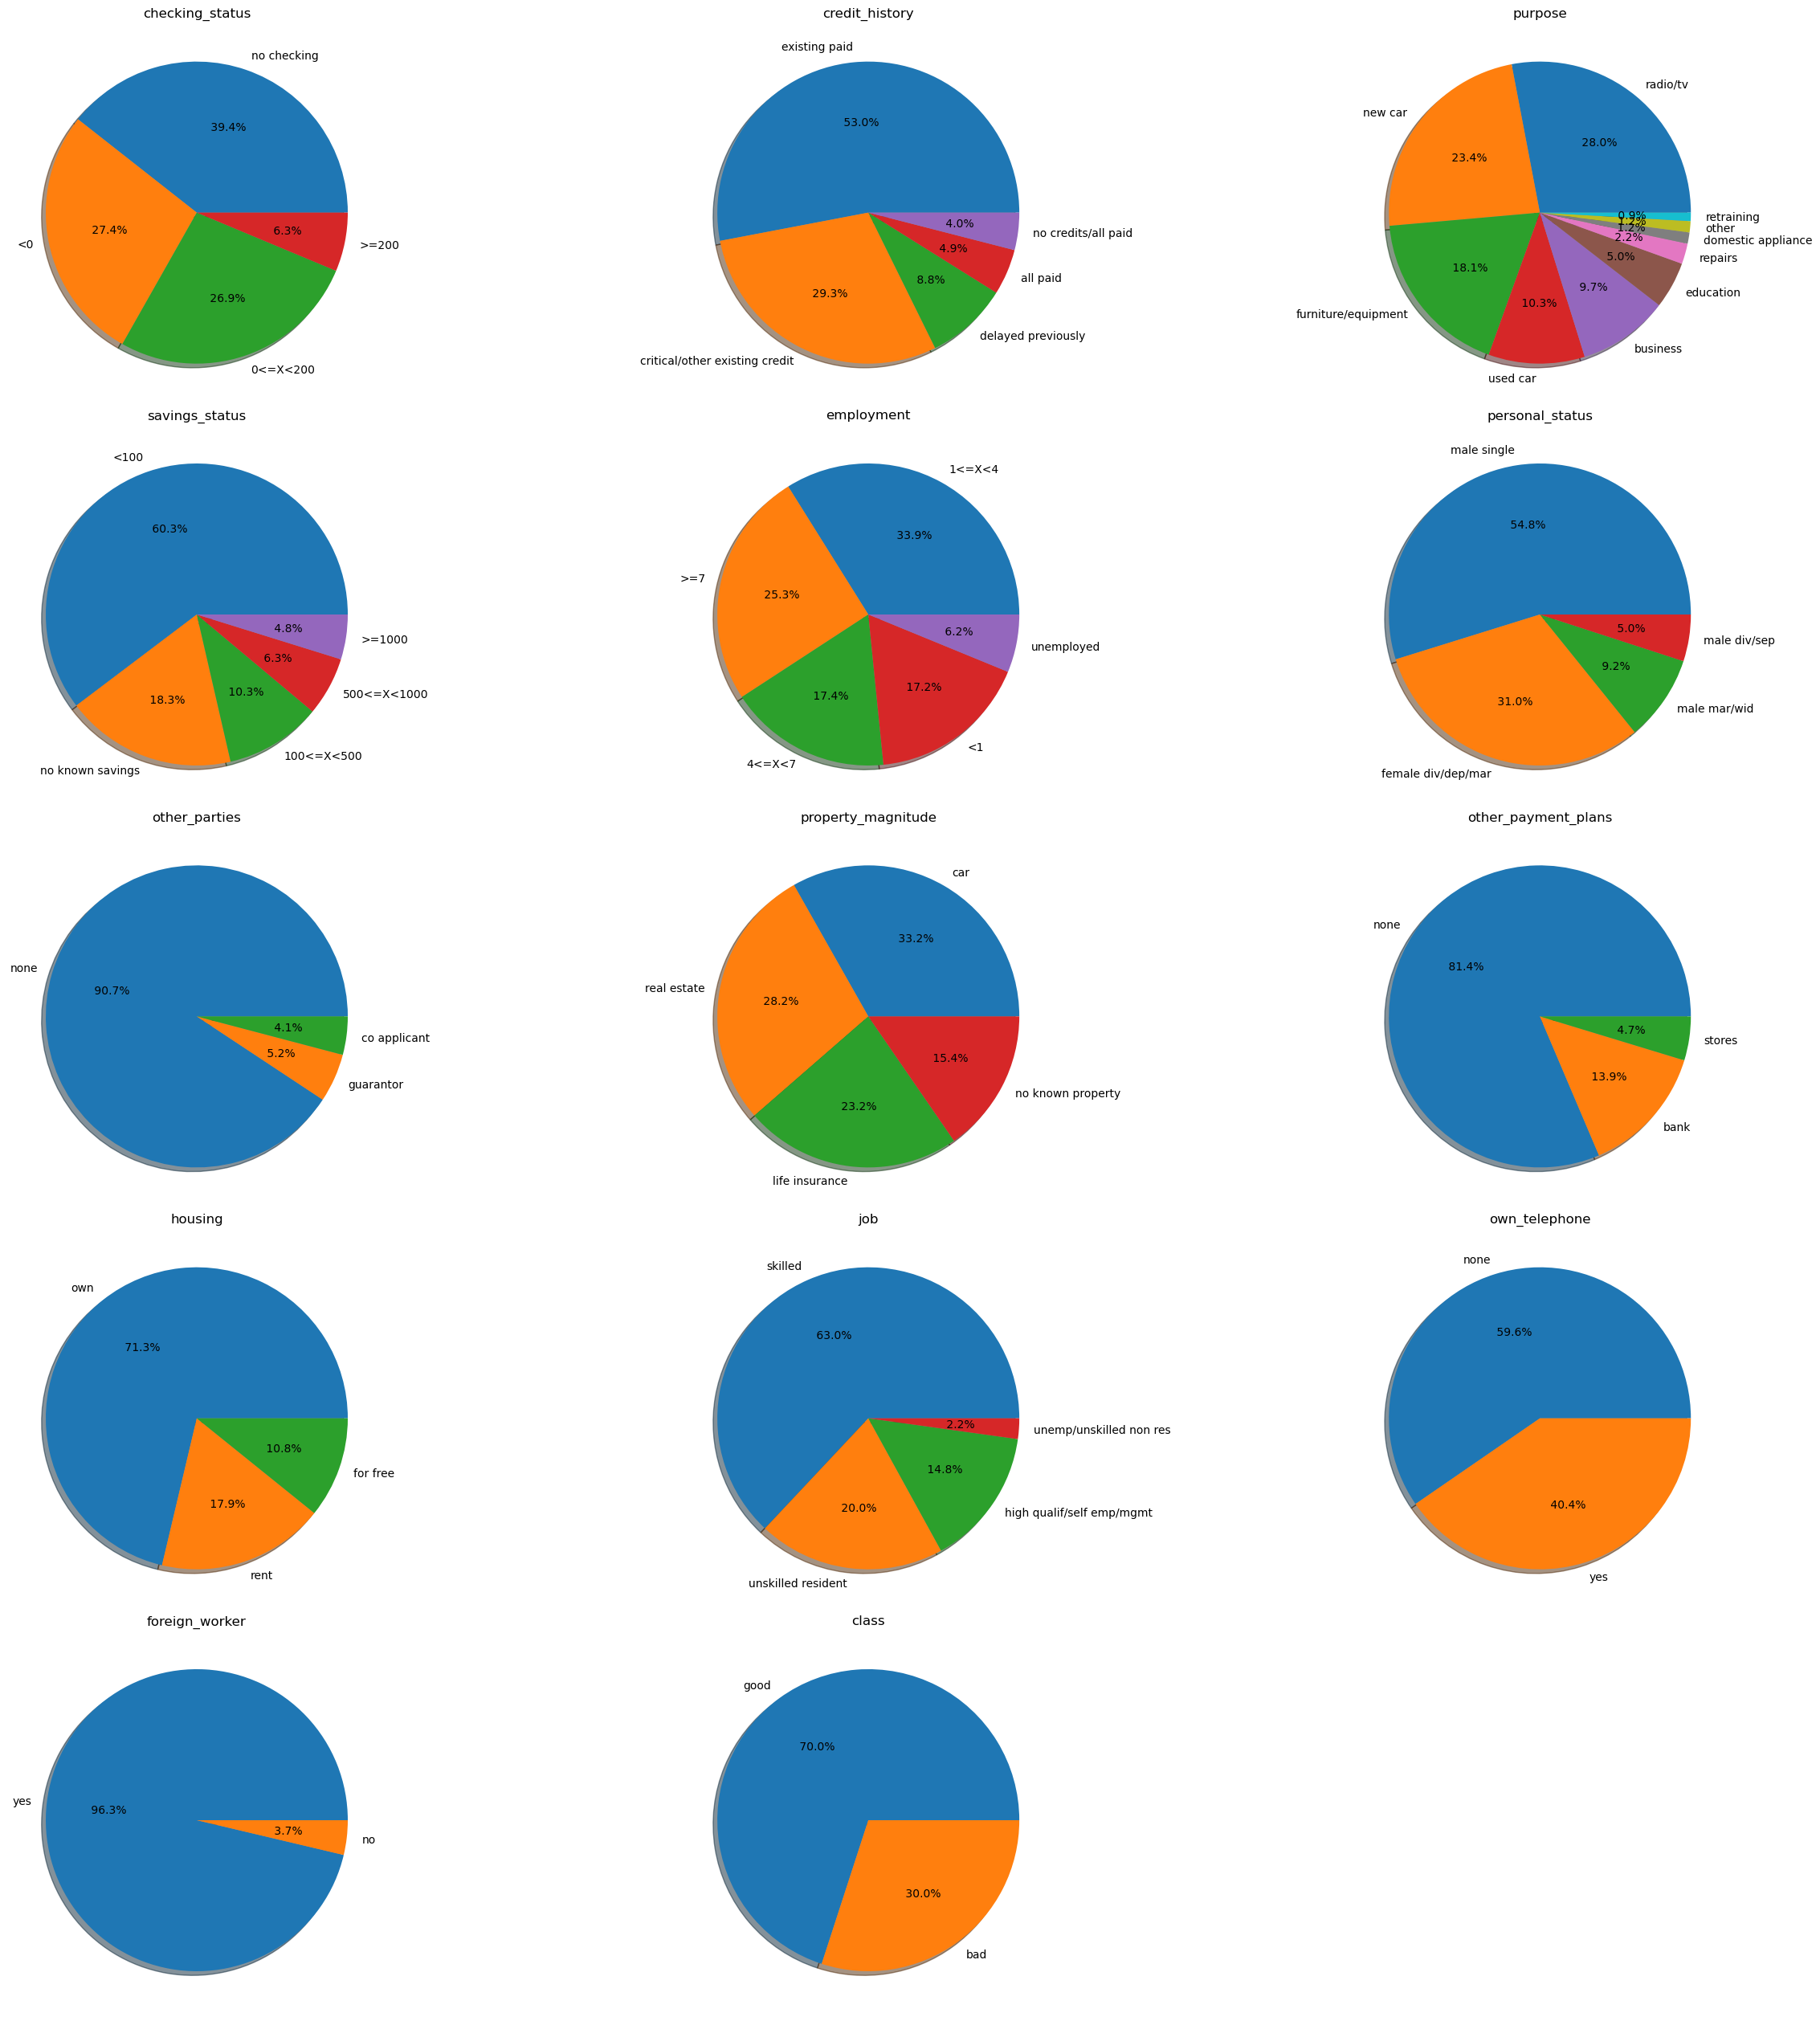

In [9]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment','personal_status', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    a=credit[lst[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(lst[i])
plt.show()

In [10]:
# Numerical Features
num=credit.select_dtypes(include=[np.number])
num.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

## **Label Encoding & Data Scaling**

In [11]:
# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
 
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [12]:
# Label Encoding
for i in list(cat.columns):
    credit[i+'_encoder']=LabelEncoder().fit_transform(credit[i])

# Taking only numerical features
num=credit.select_dtypes(include=[np.number])

# Data Scaling
scl=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

# Scaled Data
scl.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoder,credit_history_encoder,purpose_encoder,...,employment_encoder,personal_status_encoder,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,...,0.75,1.0,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,...,0.00,0.0,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,...,0.25,1.0,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,...,0.25,1.0,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,...,0.00,1.0,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0


## **Simulating semi-supervised Learning**

In [14]:
x=scl.drop('class_encoder',axis=1)
y=scl['class_encoder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Transform problem to semi supervised

In [16]:
nolabel = [-1 for _ in range(len(y_test))]
X_train_mixed = np.concatenate((x_train,x_test))
y_train_mixed = np.concatenate((y_train, nolabel))

Defining functions for model building

In [17]:

from sklearn.semi_supervised import LabelPropagation
# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)
# get labels for entire training dataset data
tran_labels = model.transduction_

In [24]:
# define supervised learning model
model2 = LogisticRegression()
# fit supervised learning model on entire training dataset
model2.fit(X_train_mixed, tran_labels)
# make predictions on hold out test set
yhat = model2.predict(x_test)
# calculate metrics
conf_lr=confusion_matrix(y_test,yhat)
acc_lr=accuracy_score(y_test,yhat)
f1_lr=f1_score(y_test,yhat)
clf_lr=classification_report(y_test,yhat)

print('*********** Logistic Regression***********')
print('\n')
print('Accuracy : ',acc_lr)
print('F1 Score : ',f1_lr)
print(5*'=====')
print('Confusion Matrix :\n',conf_lr)
print(5*'=====')
print('Classification Report :\n',clf_lr)
print(10*'========')

*********** Logistic Regression***********


Accuracy :  0.7266666666666667
F1 Score :  0.825531914893617
Confusion Matrix :
 [[ 24  62]
 [ 20 194]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.55      0.28      0.37        86
         1.0       0.76      0.91      0.83       214

    accuracy                           0.73       300
   macro avg       0.65      0.59      0.60       300
weighted avg       0.70      0.73      0.69       300



In [23]:
from xgboost import XGBClassifier
model3 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
model3.fit(X_train_mixed, tran_labels)
# make predictions
yhat = model3.predict(x_test)
# calculate metrics
conf_xg=confusion_matrix(y_test,yhat)
acc_xg=accuracy_score(y_test,yhat)
f1_xg=f1_score(y_test,yhat)
clf_xg=classification_report(y_test,yhat)

print('*********** XGboosting Regression***********')
print('\n')
print('Accuracy : ',acc_xg)
print('F1 Score : ',f1_xg)
print(5*'=====')
print('Confusion Matrix :\n',conf_xg)
print(5*'=====')
print('Classification Report :\n',clf_xg)
print(10*'========')

*********** XGboosting Regression***********


Accuracy :  0.7333333333333333
F1 Score :  0.8245614035087719
Confusion Matrix :
 [[ 32  54]
 [ 26 188]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.55      0.37      0.44        86
         1.0       0.78      0.88      0.82       214

    accuracy                           0.73       300
   macro avg       0.66      0.63      0.63       300
weighted avg       0.71      0.73      0.72       300



## **Conclusion**

Building a model using semi-supervised learning with label propagation gave results close to the real data.
The ML life cycle wasn't developped fully in this exercice, the focus was on label propagation technique.